# Exploration

What are we even doing here?

- find relationships
- find relationships between independent and dependent vars
- get some insight into what drives the target variable

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare

df = acquire.get_titanic_data()
df = df.drop(columns='deck')
df = df[~ df.age.isna()]
df = df[~ df.embarked.isna()]
train, validate, test = prepare.titanic_split(df)

train = train[['survived', 'class', 'sex', 'age', 'fare', 'embark_town', 'alone']]

train.head()

,survived,class,sex,age,fare,embark_town,alone
450,0,Second,male,36.0,27.75,Southampton,0
543,1,Second,male,32.0,26.00,Southampton,0
157,0,Third,male,30.0,8.05,Southampton,1
462,0,First,male,47.0,38.50,Southampton,1
397,0,Second,male,46.0,26.00,Southampton,1


In [11]:
df.survived.value_counts()

0    424
1    288
Name: survived, dtype: int64

Notice: survived is either `1` or `0` -- we can treat this either as a number or a category

In [16]:
df.survived.mean() # % of 1s in the data

0.4044943820224719

## Exploring the Target by itself

Text(0.5, 0, 'Survived')

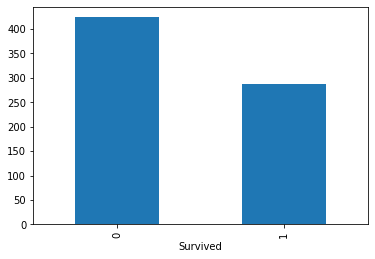

In [14]:
df.survived.value_counts().plot.bar()
plt.xlabel('Survived')

In [18]:
survival_rate = train.survived.mean()
survival_rate

0.4045226130653266

We can compare our target variable to other categorical variables by treating the target as a number and calculating the average.

### Exploring the target by other categorical variables

exploring 2 categorical variables together and treating survived as a number

In [21]:
train.groupby('sex').survived.mean()

sex
female    0.751678
male      0.196787
Name: survived, dtype: float64

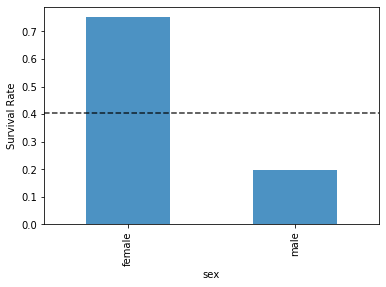

In [28]:
train.groupby('sex').survived.mean().plot.bar(alpha=.8)
plt.ylabel('Survival Rate')
plt.hlines(survival_rate, *plt.xlim(), ls='--', alpha=.8)

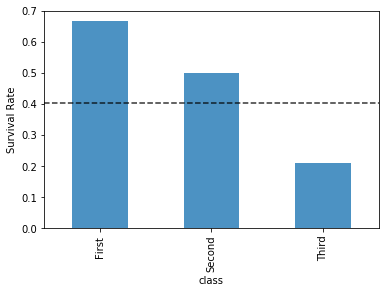

In [29]:
train.groupby('class').survived.mean().plot.bar(alpha=.8)
plt.ylabel('Survival Rate')
plt.hlines(survival_rate, *plt.xlim(), ls='--', alpha=.8)

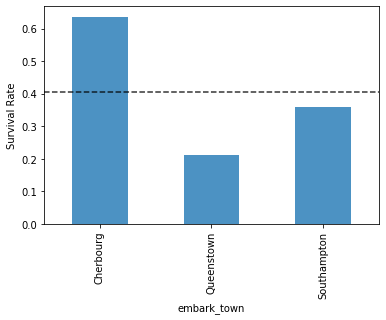

In [30]:
train.groupby('embark_town').survived.mean().plot.bar(alpha=.8)
plt.ylabel('Survival Rate')
plt.hlines(survival_rate, *plt.xlim(), ls='--', alpha=.8)

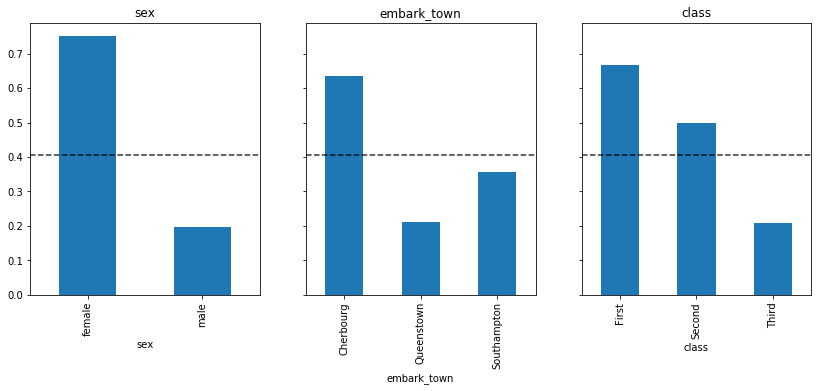

In [39]:
features = ['sex', 'embark_town', 'class']

fig, axs = plt.subplots(1, 3, figsize=(14, 5), sharey=True)

for i, feature in enumerate(features):
    train.groupby(feature).survived.mean().plot.bar(ax=axs[i])
    axs[i].set(title=feature)
    axs[i].hlines(survival_rate, *axs[i].get_xlim(), ls='--', alpha=.8)

Exploring 2 categorical variables, but now we're treating `survived` as a category, not a number.

In [40]:
pd.crosstab(train.survived, train.sex)

sex,female,male
survived,,
0,37,200
1,112,49


In [43]:
pd.crosstab(train.embark_town, train.survived, margins=True, normalize=True)

survived,0,1,All
embark_town,,,
Cherbourg,0.070352,0.123116,0.193467
Queenstown,0.037688,0.010050,0.047739
Southampton,0.487437,0.271357,0.758794
All,0.595477,0.404523,1.000000


In [47]:
train.shape

(398, 7)

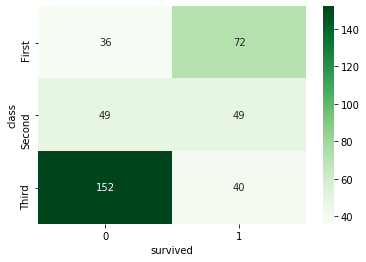

In [53]:
ctab = pd.crosstab(train['class'], train.survived)
sns.heatmap(ctab, cmap='Greens', annot=True, fmt=',')

### Comparing 3 categorical variables

- (where 1 is a boolean)
- survived, sex, class

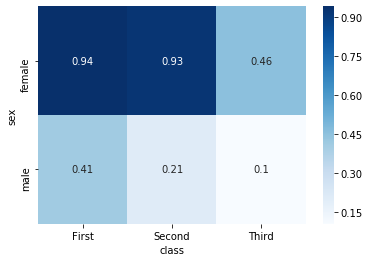

In [56]:
sns.heatmap(train.pivot_table('survived', 'sex', 'class'), cmap='Blues', annot=True)

- 94% of the female passengers in first class surived
- 21% of the male passengers in second class survived
- 46% of the female passengers in third class survived

We could use this same strategy to compare 2 categories and a continuous var too.

## Explore target + cont. vars

Looking at 2 variables, one continuous, one categorical.

In [60]:
train.groupby('survived').age.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,237.0,30.713080,13.953310,1.00,21.0,28.5,39.0,74.0
1,161.0,29.499503,15.509858,0.42,19.0,30.0,40.0,63.0


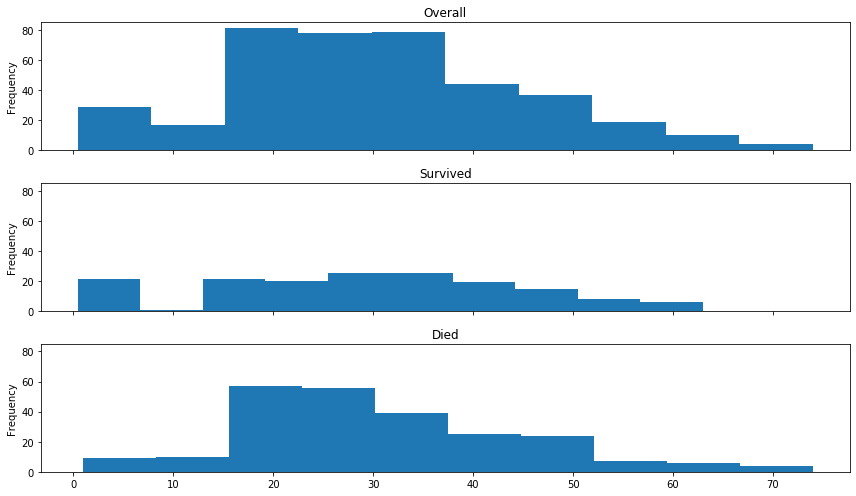

In [73]:
fig, axs = plt.subplots(3, 1, figsize=(12, 7), sharex=True, sharey=True)

train.age.plot.hist(ax=axs[0], title='Overall')
train[train.survived == 1].age.plot.hist(ax=axs[1], title='Survived')
train[train.survived == 0].age.plot.hist(ax=axs[2], title='Died')
fig.tight_layout()

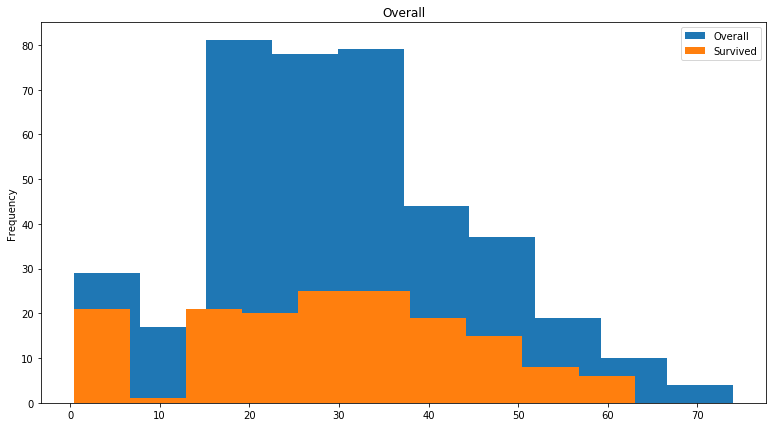

In [76]:
ax = train.age.plot.hist(title='Overall', figsize=(13, 7), label='Overall')
train[train.survived == 1].age.plot.hist(ax=ax, label='Survived')
plt.legend()

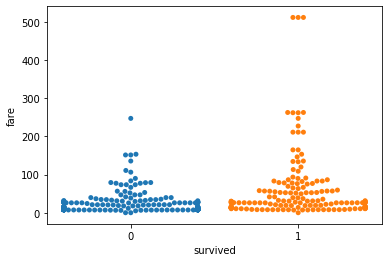

In [77]:
sns.swarmplot(data=train, y='fare', x='survived')

We can compare 1 continuous and 2 categorical variables with swarmplot as well

E.g.

- class (categorical)
- survived (categorical)
- fare (continuous)

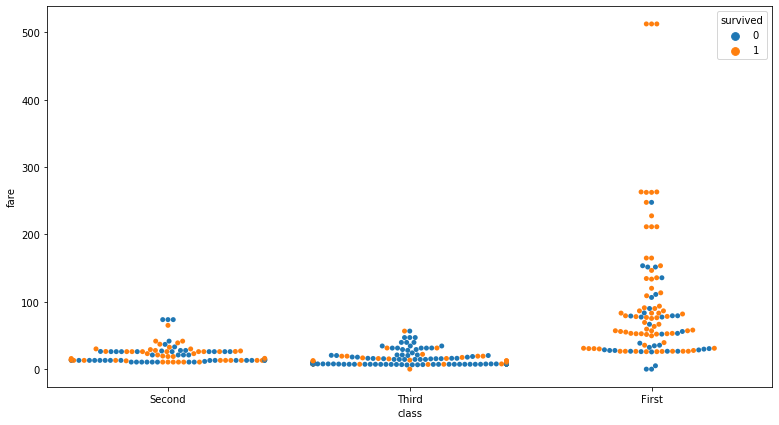

In [79]:
plt.figure(figsize=(13, 7))
sns.swarmplot(data=train, y='fare', x='class', hue='survived')

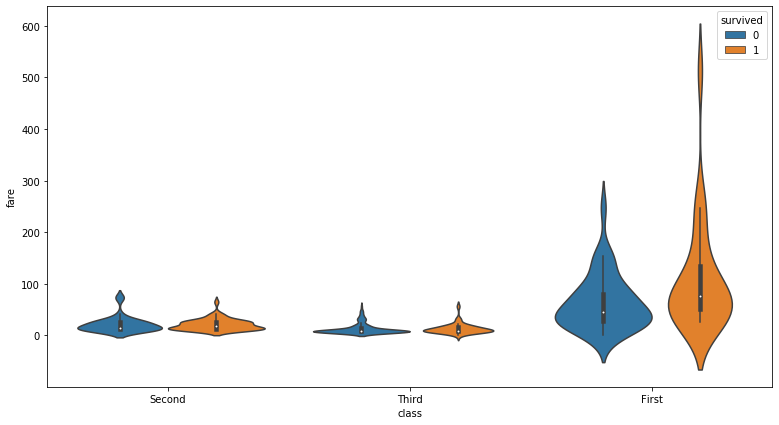

In [80]:
plt.figure(figsize=(13, 7))
sns.violinplot(data=train, y='fare', x='class', hue='survived')

## Hypothesis Testing

What's the relationship between embark town and fare?

In [83]:
train.groupby('embark_town').fare.var()

embark_town
Cherbourg      11612.869552
Queenstown       374.471129
Southampton     1475.373649
Name: fare, dtype: float64

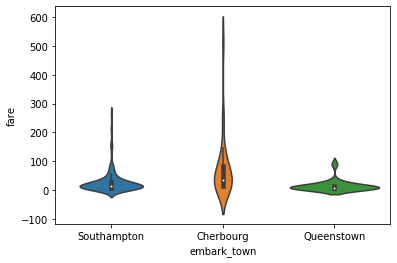

In [82]:
sns.violinplot(data=train, y='fare', x='embark_town')

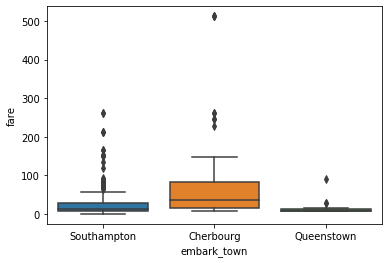

In [84]:
sns.boxplot(data=train, y='fare', x='embark_town')

- alpha = .05
- $H_0$: There is no difference in the fares paid by folks departing from cherbourg and everywhere else
- $H_a$: There is a significant difference in the fares paid in these 2 different groups

In [86]:
from scipy import stats

In [88]:
cherbourg_fares = train[train.embark_town == 'Cherbourg'].fare
rest_fares = train[train.embark_town != 'Cherbourg'].fare

t, p = stats.ttest_ind(cherbourg_fares, rest_fares)
print(f'''
t = {t:.4f}
p = {p:.8f}
''')


t = 6.7679
p = 0.00000000



We reject the null hypothesis that the fares paid by these two groups have no difference.

In [89]:
pd.crosstab(train['class'], train.embark_town)

embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,45,1,62
Second,9,1,88
Third,23,17,152
